In [1]:
from google.colab import drive

drive.mount('/content/drive')
!ls '/content/drive/My Drive/DSL Final Project/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
'Blog Post'
'Blog Post.gdoc'
 body_parts.txt
 Classifier.ipynb
'Copy of Models.ipynb'
 data_for_NN.pickle
 data_nouns.pickle
 data.pickle
'Data Science Presentation.gslides'
 featured_data.pickle
'List of users and number of posts.gdoc'
'List of users and number of posts.txt'
'most_common_nouns (1).gdoc'
 most_common_nouns.gdoc
 most_common_nouns.txt
 Planning.gdoc
'Predicting Popular Reddit Posts.ipynb'
 Scraper.ipynb
 supernaturalwords.txt
 trainer.ipynb
 vi

In [0]:
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
file = open('/content/drive/My Drive/DSL Final Project/data_nouns.pickle', 'rb')
df_noun = pickle.load(file)

In [28]:
print(df_noun)

        num_upvotes  part  night  house  ...  one  world  eyes  nightmare
0              1978     0      0      0  ...    0      0     0          0
1              1494     0      0      0  ...    0      0     0          0
3               420     0      0      0  ...    0      0     0          0
4               195     0      0      0  ...    0      0     0          0
5               188     0      0      0  ...    0      0     0          0
...             ...   ...    ...    ...  ...  ...    ...   ...        ...
202393            1     1      0      0  ...    0      0     0          0
202394            1     0      0      0  ...    0      0     0          0
202395            1     0      0      0  ...    0      0     0          0
202396            1     0      0      0  ...    0      0     0          0
202397            1     0      0      0  ...    0      0     0          0

[188822 rows x 51 columns]


In [0]:
file = open('/content/drive/My Drive/DSL Final Project/featured_data.pickle', 'rb')
df = pickle.load(file)

In [23]:
print(df)

                      author  created_utc  ... bodyparts_count supernat_count
0                    xcf3131   1417407137  ...               0              0
1                  Renner587   1417466306  ...               0              0
3                 namedghost   1417469526  ...               0              0
4            Hannah_Bardelli   1417466215  ...               0              0
5              blackeyedkids   1417477999  ...               0              0
...                      ...          ...  ...             ...            ...
202393          spookyboiii2   1575089193  ...               0              0
202394    combinedistraction   1575086462  ...               0              0
202395  Mandalor_the_Haunted   1575107648  ...               0              0
202396            Foxesvenom   1575133809  ...               0              0
202397            samuristik   1575131591  ...               0              0

[188822 rows x 24 columns]


In [0]:
df = pd.concat([df['num_upvotes'],df_noun],axis=1)

In [0]:
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [0]:
dropped = []
for i in range(len(df)):
  if df.iloc[i,3]==None or 'Removed' in df.iloc[i,3]:
    dropped.append(i)
df = df.drop(dropped)
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [0]:
flairs = pd.get_dummies(df['is_series'])
df["time_of_day"] = df["time_of_day"].apply(lambda x: "time_of_day: " + str(x))
time_of_day = pd.get_dummies(df['time_of_day'])
df["day_of_week"] = df["day_of_week"].apply(lambda x: "day_of_week: " + str(x))
day_of_week = pd.get_dummies(df['day_of_week'])
df["year_posted"] = df["year_posted"].apply(lambda x: "20" + str(x))
year_posted = pd.get_dummies(df['year_posted'])
df["month_posted"] = df["month_posted"].apply(lambda x: "month_posted: " + str(x))
month_posted = pd.get_dummies(df['month_posted'])
df = df.drop(columns=['author','created_utc','post_content','is_series','title','time_of_day','month_posted','year_posted','day_of_week'])
df = pd.concat([df,flairs,time_of_day,day_of_week,year_posted,month_posted],axis=1)
#df = pd.concat([df.iloc[:,0],time_of_day,day_of_week],axis=1)
#df = pd.concat([df['num_upvotes'],flairs],axis=1)

In [0]:
df_time = pd.DataFrame()
times = ["time_of_day: " + str(i).zfill(2) for i in range(24)]
days = ["day_of_week: " + str(i) for i in range(1,8)]
for day in days:
  for time in times:
    df_time[day + "," + time] = df[day]+df[time]

In [0]:
df_time = df_time.replace(1,0)
df_time = df_time.replace(2,1)
df_time = pd.concat([df.iloc[:,0],df_time],axis=1)
df = df_time

In [0]:
df=pd.concat([df['num_upvotes'],df['title_wordcount'],df['capitalize_title'],df['len_of_title']],axis=1)

In [0]:
data = df.values
y = data[:,0]
y = y[:,np.newaxis]
X = data[:,1:]
scalerX = StandardScaler()
scalery = StandardScaler()
scaled_X = scalerX.fit_transform(X)
scaled_y = scalery.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.5, random_state=42)

In [0]:
lasso = Lasso(alpha=0.001).fit(X_train,y_train)

In [39]:
lasso.score(X_test,y_test)

0.007291022471600518

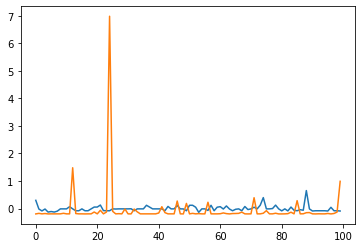

In [40]:
import matplotlib.pyplot as plt
plt.plot(lasso.predict(X_test)[:100])
plt.plot(y_test[:100])

Lasso picked 47 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

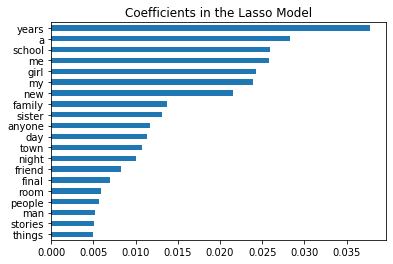

In [41]:
coef = pd.Series(lasso.coef_, index = df.columns[1:])
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values().head(0),
                     coef.sort_values().tail(20)])

imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [0]:
df_14 = df[df['time_of_day: 14'] == 1]
df_12 = df[df['time_of_day: 12'] == 1]
df_13 = df[df['time_of_day: 13'] == 1]
df_15 = df[df['time_of_day: 15'] == 1]

In [0]:
df = pd.concat([df_12,df_13,df_14,df_15])

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
regr = RandomForestRegressor(max_depth=5,n_estimators=1000, random_state=0).fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
regr.score(X_test,y_test)

0.06648547068270283

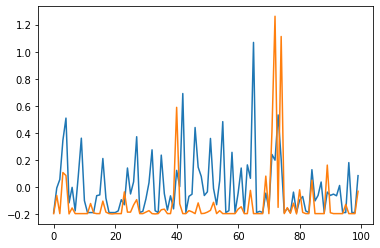

In [0]:
plt.plot(regr.predict(X_test)[:100])
plt.plot(y_test[:100])

In [0]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [0]:
params = {'n_estimators': [100,200,500,1000],
          'max_depth': [3,6,9,12],
          'eta':[.1,.3,.5],
          'learning_rate': [0.01,0.05],
          'n_jobs': [16]
          }

In [0]:
xgb = XGBRegressor()
clf = RandomizedSearchCV(xgb,params).fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[00:05:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:05:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:05:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:05:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:06:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:07:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [0]:
clf.score(X_test,y_test)

0.08525238514059585

In [0]:
print(clf.best_params_)

{'n_jobs': 16, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'eta': 0.1}


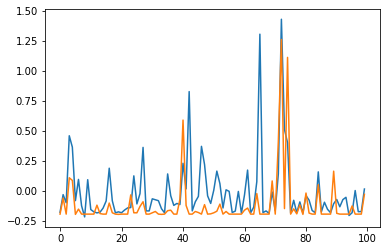

In [0]:
plt.plot(clf.predict(X_test)[0:100])
plt.plot(y_test[0:100])

Lasso picked 70 variables and eliminated the other 8 variables


Text(0.5, 1.0, 'Coefficients in the xgb')

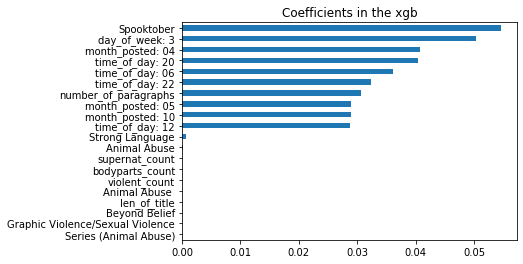

In [0]:
coef = pd.Series(clf.best_estimator_.feature_importances_, index = df.columns[1:])
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

imp_coef.plot(kind = "barh")
plt.title("Coefficients in the xgb")

[1978 1494  420 ...    1    1    1]
